## Problema 01
Suponga que es facil generar valores V.A.s cuyas FDA son dados por $F_i,i=1,...,n$. Como podiramos generar valores de una V.A cuya FDA es dado por $F(x) = \sum _{i=1}^{n} p_iF_i(x)$

Donde $p_i, i=1,...,n$ numeros no negativos cuya suma es 1?

Utilizar los resultados del presente problema para generar valores de la V.A cuya FDA es, $F(x)=\{ \frac{1-e^{-2x}+2x}{3} \space \space \space 0<x<1 \space \space \space \frac{3-e^{-2x}}{3} \space \space \space 1<x<\infty\}$

#### Sol.

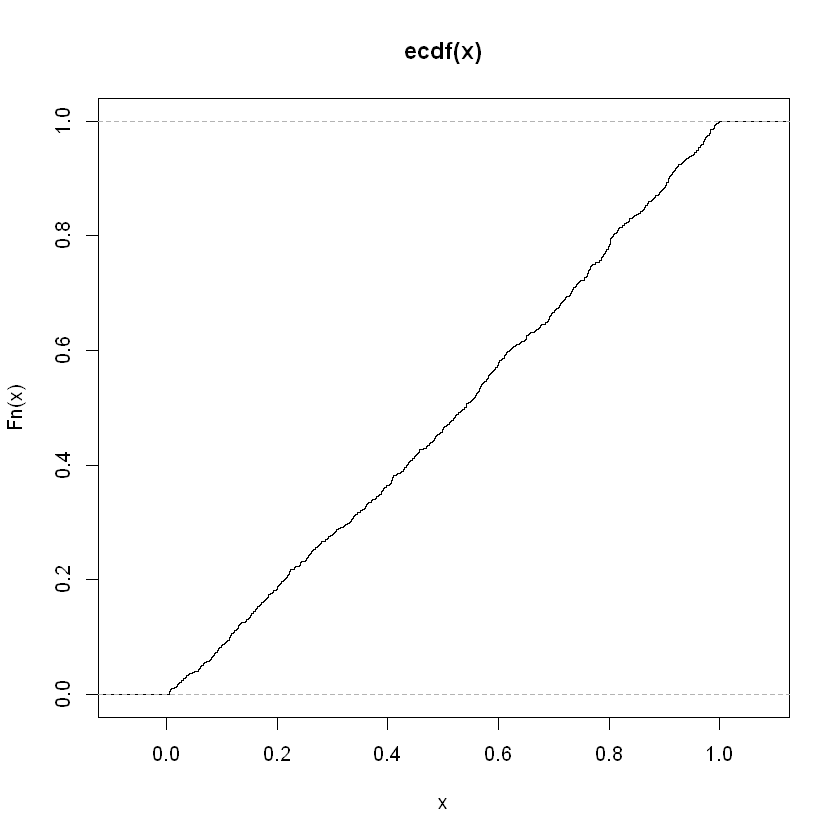

In [3]:
rm(list=ls())

n<-1000
x<-rep(0,n)
u<-runif(1,0,1)
for(i in 1:n){
    if(u<(1/3)){
        x[i]<--(1/2)*log(runif(1,0,1))
    }else{
        x[i]<-runif(1,0,1)
    }
}

plot.ecdf(x)


## Problema 02
Sea $X$ una Variable Aleatoria $Bin(n,p)$. Suponga que queremos generar valores de una Variable Aleatoria con $fmp$ $ P[X=y|X \geq  k]$ para algun $k\le n$. Sea $\alpha = P[X\geq k]$ y suponga que se ha calculado el valor de $\alpha$

- 2.1. Utilice el Metodo de la Transformada Inversa para generar valores de Y

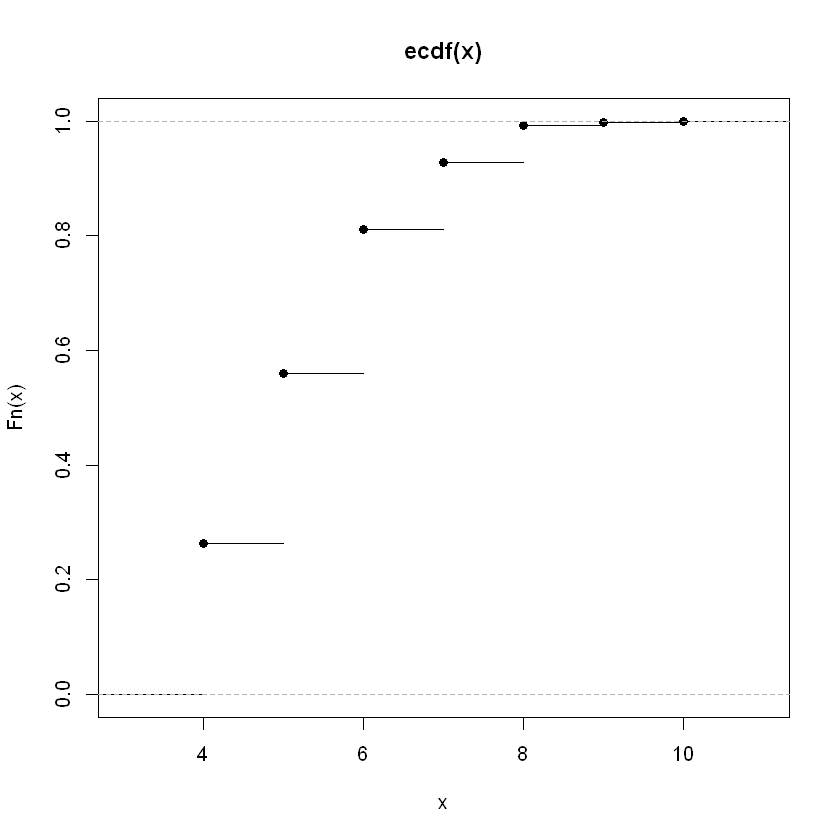

In [6]:
rm(list=ls())
r<-1000
y<-rep(0,r)
n<-10
p<-0.5
k<-4
alpha<-1-pbinom(k-1,n,p)
for(j in 1:r){
    u<-runif(1,0,1)
    i<-k
    p_<-(dbinom(i,n,p))/alpha
    F<-p_
    while(u>=F){
        p_<-p_*((n-i)/(i+1))*(p/(1-p))
        F<-F+p_
        i<-i+1
    }
    y[j]<-i
}

plot.ecdf(y)

- 2.2. Utilice otro metodo para generar valores de Y

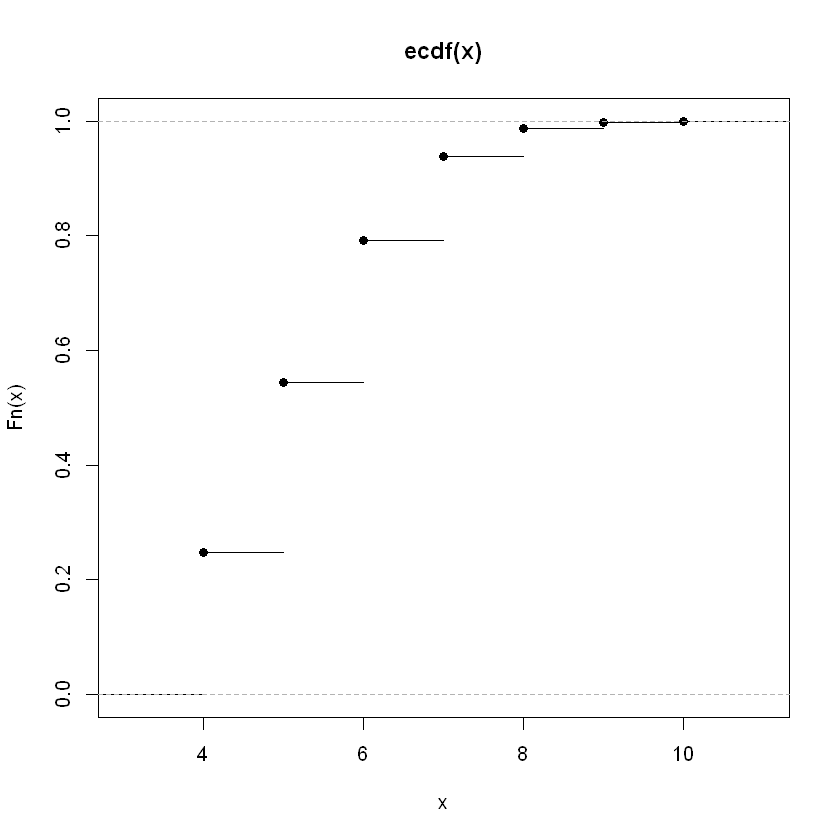

In [7]:
# Metodo: A-R
# X ~ f(x) = Ecuacion    k<x
# Y ~ g(x) = Bin(n,p)    Y=0,1,...,n
# Es conveniente hallar el cte menor
# c = cte = 1/alpha
# Importante
# f(x)/c*g(x) = 1 para todo k<=x

rm(list=ls())
r<-10000
y<-rep(0,r)
iter<-rep(0,r)
n<-10
p<-0.5
k<-4  # parametro para elegir

for(i in 1:r){
    iterAux<-0
    yAux<-rbinom(1,n,p)
    while(yAux<k){
        iterAux<-iterAux+1
        yAux<-rbinom(1,n,p)
    }
    y[i]<-yAux
    iter[i]<-iterAux
}

plot.ecdf(y)

## Problema 03
Sea X una Variable Aleatoria Exponencial con tasa $\lambda$. Utilice el metodo de Acpetacion-Rechazo para simular valores de una variable aleatoria cuya Distrivucion es la distribucion Condicional de X dado que $X<0.05$ Es decir, tiene la siguiente funcion de densidad
$$f(x)  = \frac{e^{-x}}{1-e^{-0.05}} \space \space 0<x<0.05$$;
Estimar $E[ X | X<0.05 ]$

[1] 0.02522474

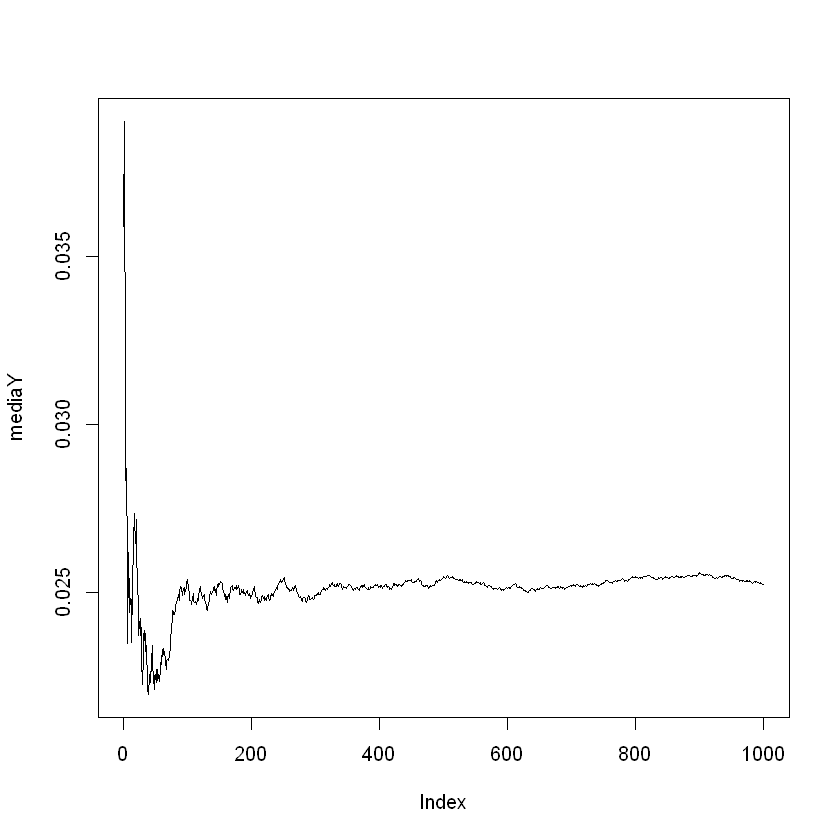

In [11]:
# Metodo A-R

#  X  ~ f(x)=Ecuacion_libro;    0<x<0.05
#  Y  ~ g(x)=Exp(1);            0<x
#       lambda=1, es conveniente en hallar cte menor
#  c=cte=1/(1-exp(-0.05))
#  IMPORTANTE
#  f(x)/c*g(x)=1 para todo 0<x<0.05

rm(list=ls())
k<-1000
y<-rep(0,k)
iter<-rep(0,k)

for(i in 1:k){
    iterAux<-0
    yAux<--(1/1)*log(runif(1,0,1))
    while(yAux>0.05){
        iterAux<-iterAux+1
        yAux<--(1/1)*log(runif(1,0,1))
    }
    y[i]<-yAux
    iter[i]<-iterAux
}


n<-1:k
mediaY <- cumsum(y)/n
plot(mediaY,type = 'l')
mediaY[length(mediaY)]

## Problema 04
Suponga que una compañia de seguros recibe solicitudes de indemnizaciones debido a la ocurrencia de siniestros, y que son descritos por un proceso de Poisson con una tasa de 10 indemnizaciones por dia. La cantidad de dinero demandado en cada solicitud es descrita por un modelo exponencial con media de S/. 1000ns. Ademas, la compañia recibe desembolsos diarios de S/. 11000ns. Si la compañia inica sus operaciones con un capital inicial de S/. 25000ns. Utilizar simulacion para estimar la probabilidad de que el capital neto positivo en los primeros 365 dias

#### Sol.

[1] 1

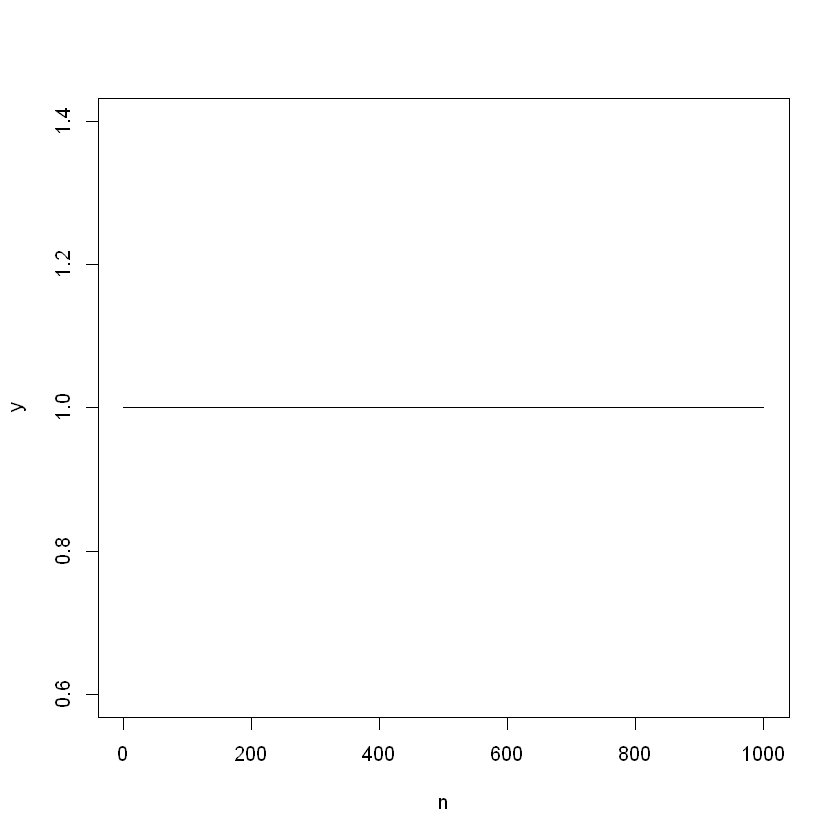

In [15]:

rm(list=ls())

##############################
Poisson_homogeneo <- function(T,lambda){
    t<-0
    I<-0
    S<-NULL
    while(t<T){
        t<-t-(1/lambda)*log(runif(1,0,1))
        I<-I+1
        S[I]<-t
    }
    return(I-1)
}

# Poisson homogeneo
k<-1000
I<-matrix(rep(0,k,365), nrow=k,ncol=365)
CapitalNetoDiario <- matrix(rep(0,k,365), nrow=k, ncol=365)
CapitalNetoAnho <- rep(0,k)

for(i in 1:k){
    for(j in 1:365){
        I[i,j]<-Poisson_homogeneo(1,10)
        CapitalNetoDiario[i,j] = 11000+1000+log(prod(runif(I[i,j],0,1)))
    }
    CapitalNetoAnho[i]<-sum(CapitalNetoDiario[i,])
}

z<-CapitalNetoAnho-250000>0
n<-1:k
y<-cumsum(z)/n
plot(n,y,type = 'l')
y[length(y)]

